> Simulation Tables

# import

In [15]:
import pandas as pd

In [16]:
data_fivenodes = pd.read_csv('./simulation_results/Real_simulation_reshape/DYGRENCODER_fivedones_Simulation.csv')

In [17]:
data_chickenpox = pd.read_csv('./simulation_results/Real_simulation_reshape/DYGRENCODER_chikenpox_Simulation.csv')

In [18]:
data_pedal = pd.read_csv('./simulation_results/Real_simulation_reshape/DYGRENCODER_pedalme_Simulation.csv')

In [19]:
data_pedal2 = pd.read_csv('./simulation_results/Real_simulation_reshape/DYGRENCODER_pedalme_Simulation_itstgcnsnd.csv')

In [20]:
data__wiki = pd.read_csv('./simulation_results/Real_simulation_reshape/DYGRENCODER_wikimath.csv')

In [21]:
data_wiki_GSO = pd.read_csv('./simulation_results/Real_simulation_reshape/DYGRENCODER_wikimath_GSO_st.csv')

In [22]:
data_windmillsmall = pd.read_csv('./simulation_results/Real_simulation_reshape/DYGRENCODER_windmillsmall.csv')

In [23]:
data_monte = pd.read_csv('./simulation_results/Real_simulation_reshape/DYGRENCODER_monte.csv')

In [24]:
data = pd.concat([data_fivenodes,data_chickenpox,data_pedal,data__wiki,data_windmillsmall,data_monte]);data

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time
0,fivenodes,STGCN,0.7,rand,2,12,linear,50,1.478958,65.150900
1,fivenodes,STGCN,0.7,rand,2,12,nearest,50,1.447664,53.222811
2,fivenodes,IT-STGCN,0.7,rand,2,12,linear,50,1.167638,58.479730
3,fivenodes,IT-STGCN,0.7,rand,2,12,nearest,50,1.226659,45.294742
4,fivenodes,STGCN,0.7,rand,2,12,linear,50,1.709989,33.037987
...,...,...,...,...,...,...,...,...,...,...
355,monte,IT-STGCN,0.7,rand,4,12,nearest,50,1.187441,548.599180
356,monte,STGCN,0.7,rand,4,12,nearest,50,1.521904,298.538523
357,monte,IT-STGCN,0.7,rand,4,12,nearest,50,1.190279,588.157304
358,monte,STGCN,0.7,rand,4,12,nearest,50,1.339491,245.457024


In [25]:
data.to_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_DYGRENCODER.csv',index=False)

In [26]:
pedal_wiki_GSO = pd.concat([data_pedal2,data_wiki_GSO])

In [224]:
pedal_wiki_GSO.to_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_DYGRENCODER_pedal_wiki_GSO.csv',index=False)

# Fivenodes

## Baseline

In [168]:
pd.merge(data.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method','lags'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method','lags'])['mse'].std().reset_index(),
         on=['method','nof_filters','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,nof_filters,method,lags,mean,std
0,12,IT-STGCN,2,1.113,0.037
1,12,STGCN,2,1.115,0.038


## Random

In [169]:
pd.merge(data.query("dataset=='fivenodes' and mtype=='rand'").groupby(['mrate','nof_filters','method','lags'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype=='rand'").groupby(['mrate','nof_filters','method','lags'])['mse'].std().reset_index(),
         on=['method','nof_filters','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,nof_filters,method,lags,mean,std
0,0.7,12,IT-STGCN,2,1.258,0.069
1,0.7,12,STGCN,2,1.494,0.133
2,0.8,12,IT-STGCN,2,1.322,0.070
3,0.8,12,STGCN,2,1.508,0.137


## Block

In [170]:
pd.merge(data.query("dataset=='fivenodes' and mtype=='block'").groupby(['mrate','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='fivenodes' and mtype=='block'").groupby(['mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','nof_filters','mrate']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,nof_filters,method,mean,std
0,0.125,12,IT-STGCN,1.126,0.033
1,0.125,12,STGCN,1.154,0.040


# ChickenpoxDatasetLoader(lags=4)

## Baseline

In [171]:
pd.merge(data.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['nof_filters','method'])['mse'].std().reset_index(),
         on=['method','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,nof_filters,method,mean,std
0,12,IT-STGCN,0.910,0.042
1,12,STGCN,0.902,0.058


## Random

In [172]:
pd.merge(data.query("dataset=='chickenpox' and mtype=='rand'").groupby(['mrate','inter_method','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype=='rand'").groupby(['mrate','inter_method','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,inter_method,nof_filters,method,mean,std
0,0.3,linear,12,IT-STGCN,0.868,0.028
1,0.3,linear,12,STGCN,1.080,0.037
2,0.8,linear,12,IT-STGCN,1.399,0.063
3,0.8,linear,12,STGCN,2.127,0.240


## Block

In [173]:
pd.merge(data.query("dataset=='chickenpox' and mtype=='block'").groupby(['inter_method','mrate','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='chickenpox' and mtype=='block'").groupby(['inter_method','mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'})

,inter_method,mrate,nof_filters,method,mean,std
0,linear,0.28777,12,IT-STGCN,0.898825,0.034600
1,linear,0.28777,12,STGCN,0.912353,0.043433
2,nearest,0.28777,12,IT-STGCN,0.908500,0.043167
3,nearest,0.28777,12,STGCN,0.930462,0.035268


# PedalMeDatasetLoader (lags=4)

## Baseline

In [174]:
pd.merge(data.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['lags','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['lags','nof_filters','method'])['mse'].std().reset_index(),
         on=['method','lags','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,lags,nof_filters,method,mean,std
0,4,12,IT-STGCN,1.197,0.052
1,4,12,STGCN,1.182,0.041


## Random

In [175]:
pd.merge(data.query("dataset=='pedalme' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,inter_method,method,mean,std
0,0.3,4,linear,IT-STGCN,1.207,0.046
1,0.3,4,linear,STGCN,1.279,0.061
2,0.3,4,nearest,IT-STGCN,1.205,0.075
3,0.3,4,nearest,STGCN,1.289,0.096
4,0.6,4,linear,IT-STGCN,1.294,0.056
5,0.6,4,linear,STGCN,1.526,0.078
6,0.6,4,nearest,IT-STGCN,1.285,0.051
7,0.6,4,nearest,STGCN,1.513,0.083


## Block

In [176]:
pd.merge(data.query("dataset=='pedalme' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='pedalme' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.286,4,linear,IT-STGCN,1.167,0.040
1,0.286,4,linear,STGCN,1.222,0.054
2,0.286,4,nearest,IT-STGCN,1.165,0.032
3,0.286,4,nearest,STGCN,1.269,0.066


## W_st

In [177]:
pd.merge(data_pedal2.query("mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data_pedal2.query("mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.3,4,linear,IT-STGCN,1.222,0.083
1,0.3,4,linear,STGCN,1.276,0.058
2,0.3,4,nearest,IT-STGCN,1.208,0.091
3,0.3,4,nearest,STGCN,1.281,0.068
4,0.6,4,linear,IT-STGCN,1.287,0.095
5,0.6,4,linear,STGCN,1.497,0.077
6,0.6,4,nearest,IT-STGCN,1.305,0.131
7,0.6,4,nearest,STGCN,1.513,0.073


In [178]:
pd.merge(data_pedal2.query("mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data_pedal2.query("mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

,mrate,lags,inter_method,method,mean,std
0,0.286,4,linear,IT-STGCN,1.196,0.055
1,0.286,4,linear,STGCN,1.224,0.037
2,0.286,4,nearest,IT-STGCN,1.204,0.063
3,0.286,4,nearest,STGCN,1.246,0.043


# WikiMathsDatasetLoader (lags=8)

## Baseline

In [268]:
pd.merge(data.query("dataset=='wikimath' and mrate==0").groupby(['lags','nof_filters','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mrate==0").groupby(['lags','nof_filters','method'])['mse'].std().reset_index(),
         on=['lags','nof_filters','method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,lags,nof_filters,method,mean,std
0,8,12,IT-STGCN,0.563,0.030
1,8,12,STGCN,0.560,0.029


## Random

In [269]:
pd.merge(data.query("dataset=='wikimath' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,method,mean,std
0,0.3,8,IT-STGCN,0.578,0.031
1,0.3,8,STGCN,0.562,0.016
2,0.5,8,IT-STGCN,0.565,0.024
3,0.5,8,STGCN,0.614,0.024
4,0.6,8,IT-STGCN,0.566,0.021
5,0.6,8,STGCN,0.644,0.032
6,0.8,8,IT-STGCN,0.606,0.017
7,0.8,8,STGCN,0.770,0.045


## Block

In [270]:
pd.merge(data.query("dataset=='wikimath' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='wikimath' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,method,mean,std
0,0.119837,8,IT-STGCN,0.563498,0.024983
1,0.119837,8,STGCN,0.546224,0.015992


## missing values on the same nodes

In [271]:
pd.merge(data_wiki_GSO.groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
        data_wiki_GSO.groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,method,mean,std
0,0.512,8,IT-STGCN,0.561,0.031
1,0.512,8,STGCN,0.626,0.027


# WindmillOutputSmallDatasetLoader (lags=8)

## Baseline

In [12]:
pd.merge(data.query("dataset=='windmillsmall' and mrate==0").groupby(['lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mrate==0").groupby(['lags','method'])['mse'].std().reset_index(),
         on=['method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mean,lags,method,std


## Random

In [13]:
pd.merge(data.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mrate,lags,method,mean,std
0,0.7,8,IT-STGCN,1.123,0.009
1,0.7,8,STGCN,1.687,0.011


## Block

In [14]:
pd.merge(data.query("dataset=='windmillsmall' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='windmillsmall' and mtype=='block'").groupby(['mrate','lags','method'])['mse'].std().reset_index(),
         on=['method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,mean,mrate,lags,method,std


# Montevideobus (lags=4)

## Baseline

In [255]:
pd.merge(data.query("dataset=='monte' and mrate==0").groupby(['lags','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mrate==0").groupby(['lags','method'])['mse'].std().reset_index(),
         on=['method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

,lags,method,mean,std
0,4,IT-STGCN,1.008,0.044
1,4,STGCN,0.983,0.011


## Random

In [256]:
pd.merge(data.query("dataset=='monte' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mtype=='rand'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['mrate','inter_method','method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,inter_method,method,mean,std
0,0.3,4,nearest,IT-STGCN,1.026822,0.058198
1,0.3,4,nearest,STGCN,1.173290,0.108070
2,0.5,4,nearest,IT-STGCN,1.080011,0.068523
3,0.5,4,nearest,STGCN,1.285871,0.139744
4,0.7,4,nearest,IT-STGCN,1.197729,0.087667
5,0.7,4,nearest,STGCN,1.467420,0.228006
6,0.8,4,nearest,IT-STGCN,1.215692,0.117963
7,0.8,4,nearest,STGCN,1.357897,0.148740


## Block

In [257]:
pd.merge(data.query("dataset=='monte' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         data.query("dataset=='monte' and mtype=='block'").groupby(['mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'})

,mrate,lags,inter_method,method,mean,std
0,0.149142,4,nearest,IT-STGCN,1.005486,0.046063
1,0.149142,4,nearest,STGCN,1.030326,0.044023


# Check

In [2]:
import itstgcnDYGRENCODER
import torch
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import random

In [5]:
class Eval_csy:
    def __init__(self,learner,train_dataset):
        self.learner = learner
        # self.learner.model.eval()
        try:self.learner.model.eval()
        except:pass
        self.train_dataset = train_dataset
        self.lags = self.learner.lags
        rslt_tr = self.learner(self.train_dataset) 
        self.X_tr = rslt_tr['X']
        self.y_tr = rslt_tr['y']
        self.f_tr = torch.concat([self.train_dataset[0].x.T,self.y_tr],axis=0).float()
        self.yhat_tr = rslt_tr['yhat']
        self.fhat_tr = torch.concat([self.train_dataset[0].x.T,self.yhat_tr],axis=0).float()

In [6]:
from plotnine import *

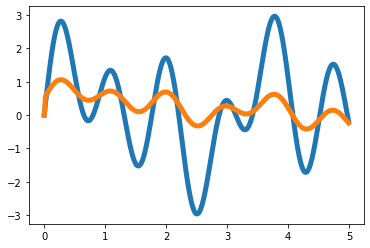

In [7]:
T = 500
t = np.arange(T)/T * 5

x = 1*np.sin(2*t)+np.sin(4*t)+1.5*np.sin(7*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [8]:
loader1 = itstgcnDYGRENCODER.DatasetLoader(data_dict1)

In [9]:
dataset = loader1.get_dataset(lags=4)

mindex = itstgcn.rand_mindex(dataset,mrate=0)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [47]:
mindex = [random.sample(range(0, T), int(T*0.7)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcnDYGRENCODER.miss(dataset,mindex,mtype='block')

In [48]:
dataset_padded = itstgcnDYGRENCODER.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [49]:
lrnr = itstgcnDYGRENCODER.StgcnLearner(dataset_padded)

In [50]:
lrnr.learn(filters=32,epoch=10)

In [51]:
lrnr1 = itstgcnDYGRENCODER.ITStgcnLearner(dataset_padded)

In [52]:
lrnr1.learn(filters=32,epoch=10)

In [53]:
evtor = Eval_csy(lrnr,dataset_padded)

In [54]:
evtor1 = Eval_csy(lrnr1,dataset_padded)

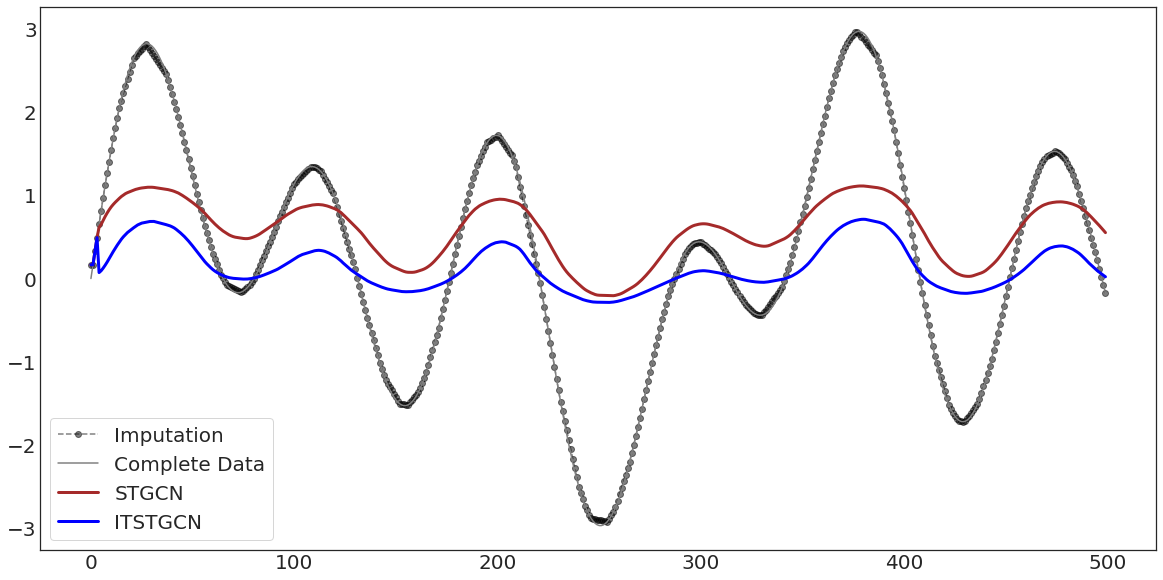

In [55]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

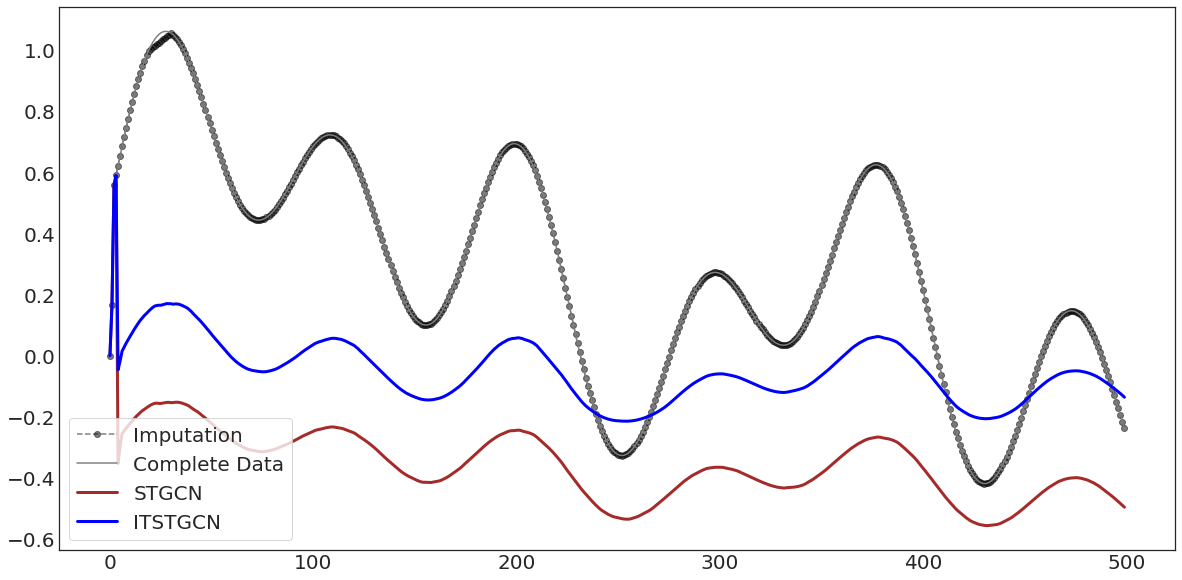

In [56]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

In [ ]:
import itstgcnsnd
import torch
import numpy as np

In [ ]:
loader1 = itstgcnsnd.DatasetLoader(data_dict1)

In [ ]:
dataset = loader1.get_dataset(lags=2)

mindex = itstgcn.rand_mindex(dataset,mrate=0)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [ ]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(20,30)))]]
dataset_miss = itstgcnsnd.miss(dataset,mindex,mtype='block')

In [ ]:
dataset_padded = itstgcnsnd.padding(dataset_miss,interpolation_method='linear')

`-` 학습

In [ ]:
lrnr = itstgcnsnd.StgcnLearner(dataset_padded)

In [ ]:
lrnr.learn(filters=32,epoch=5)

In [ ]:
lrnr1 = itstgcnsnd.ITStgcnLearner(dataset_padded)

In [ ]:
lrnr1.learn(filters=32,epoch=5)

In [ ]:
evtor = Eval_csy(lrnr,dataset_padded)

In [ ]:
evtor1 = Eval_csy(lrnr1,dataset_padded)

In [ ]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,0],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['x'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

In [ ]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax.plot(evtor.f_tr[:,1],'--o',color='black',alpha=0.5,label='Imputation')
    ax.plot(data1['y'][:],'-',color='grey',label='Complete Data')
    ax.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax.plot(evtor1.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    
    ax.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

# hyperparameter 

In [ ]:
WindmillOutputSmallDatasetLoader()

In [2]:
import itstgcn

data_dict = itstgcn.load_data('./data/fivenodes.pkl')
loader = itstgcn.DatasetLoader(data_dict)

from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
loader1 = ChickenpoxDatasetLoader()

from torch_geometric_temporal.dataset import PedalMeDatasetLoader
loader2 = PedalMeDatasetLoader()

from torch_geometric_temporal.dataset import WikiMathsDatasetLoader
loader3 = WikiMathsDatasetLoader()

# from torch_geometric_temporal.dataset import WindmillOutputSmallDatasetLoader
# loader6 = WindmillOutputSmallDatasetLoader()

from torch_geometric_temporal.dataset import MontevideoBusDatasetLoader
loader10 = MontevideoBusDatasetLoader()

In [3]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterable):
        return iterable

|Dataset|RecurrentGCN|Method|Missing Rate|Filters|Lags|Mean|SD|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|fivenodes|GConvGRU|IT-STGCN|0.7|12|2|1.167|0.059|
|fivenodes|GConvGRU|STGCN|0.7|12|2|2.077|0.252|
|chickenpox|GConvGRU|IT-STGCN|0.8|16|4|1.586|0.199|
|chickenpox|GConvGRU|STGCN|0.8|16|4|2.529|0.292|
|pedalme|GConvGRU|IT-STGCN|0.6|12|4|1.571|0.277|
|pedalme|GConvGRU|STGCN|0.6|12|4|1.753|0.239|
|wikimath|GConvGRU|IT-STGCN|0.8|12|8|0.687|0.021|
|wikimath|GConvGRU|STGCN|0.8|12|8|0.932|0.04|
|windmillsmall|GConvGRU|IT-STGCN|0.7|12|8|1.180|0.035|
|windmillsmall|GConvGRU|STGCN|0.7|12|8|1.636|0.088|
|monte|GConvGRU|IT-STGCN|0.8|12|4|1.096|0.019|
|monte|GConvGRU|STGCN|0.8|12|4|1.516|0.040|

In [7]:
DyGrEncoder?

Init signature:
DyGrEncoder(
    conv_out_channels: int,
    conv_num_layers: int,
    conv_aggr: str,
    lstm_out_channels: int,
    lstm_num_layers: int,
)
Docstring:     
An implementation of the integrated Gated Graph Convolution Long Short
Term Memory Layer. For details see this paper: `"Predictive Temporal Embedding
of Dynamic Graphs." <https://ieeexplore.ieee.org/document/9073186>`_

Args:
    conv_out_channels (int): Number of output channels for the GGCN.
    conv_num_layers (int): Number of Gated Graph Convolutions.
    conv_aggr (str): Aggregation scheme to use
        (:obj:`"add"`, :obj:`"mean"`, :obj:`"max"`).
    lstm_out_channels (int): Number of LSTM channels.
    lstm_num_layers (int): Number of neurons in LSTM.
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.
File:           ~/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torch_geometric_temporal/nn/recurrent/dygrae.py
Type:           type
Subclasses:     


In [6]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import DyGrEncoder

# from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
from torch_geometric_temporal.signal import temporal_signal_split

# loader1 = ChickenpoxDatasetLoader()

dataset = loader.get_dataset(lags=2)
dataset1 = loader1.get_dataset(lags=4)
dataset2 = loader2.get_dataset(lags=4)
dataset3 = loader3.get_dataset(lags=8)
# dataset6 = loader6.get_dataset(lags=8)
dataset10 = loader10.get_dataset(lags=4)

train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.2)
train_dataset1, test_dataset1 = temporal_signal_split(dataset1, train_ratio=0.2)
train_dataset2, test_dataset2 = temporal_signal_split(dataset2, train_ratio=0.2)
train_dataset3, test_dataset3 = temporal_signal_split(dataset3, train_ratio=0.2)
# train_dataset6, test_dataset6 = temporal_signal_split(dataset6, train_ratio=0.2)
train_dataset10, test_dataset10 = temporal_signal_split(dataset10, train_ratio=0.2)

In [ ]:
# _a = itstgcn.load_data('./data/Windmillsmall.pkl')

In [10]:
dataset6 = _a.get_dataset(lags=8)

In [11]:
train_dataset6, test_dataset6 = temporal_signal_split(dataset6, train_ratio=0.2)

In [12]:
class RecurrentGCN(torch.nn.Module):
    def __init__(self, node_features, filters):
        super(RecurrentGCN, self).__init__()
        self.recurrent = DyGrEncoder(conv_out_channels=node_features, conv_num_layers=1, conv_aggr="mean", lstm_out_channels=filters, lstm_num_layers=1)
        self.linear = torch.nn.Linear(filters, 1)

    def forward(self, x, edge_index, edge_weight, h_0, c_0):
        h, h_0, c_0 = self.recurrent(x, edge_index, edge_weight, h_0, c_0)
        h = F.relu(h)
        h = self.linear(h)
        return h, h_0, c_0

### fivenodes Nodes = 2, Filters = 12

In [32]:
model = RecurrentGCN(node_features=2, filters= 12)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()

for epoch in tqdm(range(50)):
    cost = 0
    h, c = None, None
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset):
        y_hat, h, c = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 50/50 [00:06<00:00,  7.50it/s]


In [33]:
model.eval()
cost = 0
h, c = None, None
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset):
    y_hat, h, c = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 1.1550


In [34]:
_c = [_a1[i].detach() for i in range(len(_a1))]

_e = [_d[i].detach() for i in range(len(_d))]

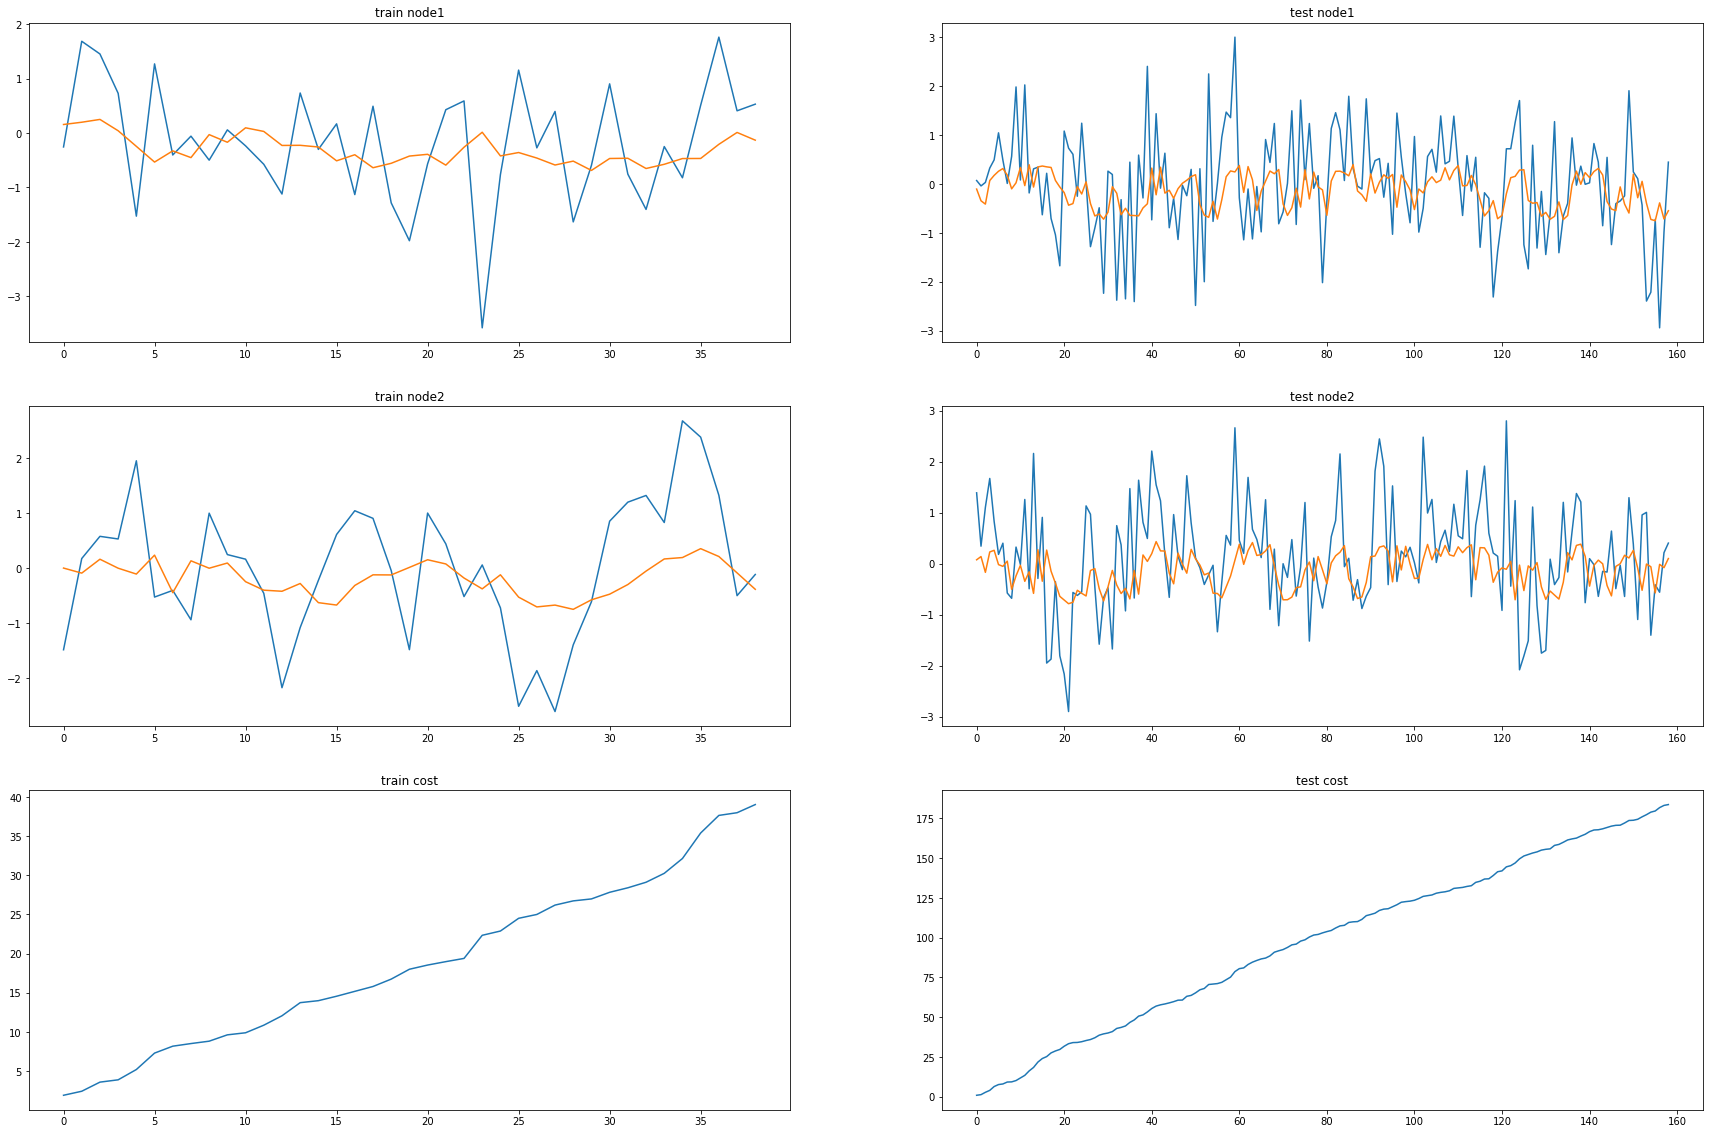

In [35]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset.targets[i][0] for i in range(train_dataset.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset.targets[i][0] for i in range(test_dataset.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset.targets[i][1] for i in range(train_dataset.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset.targets[i][1] for i in range(test_dataset.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Chickenpox Nodes = 4, Filters = 12

In [37]:
model1 = RecurrentGCN(node_features=4, filters=12)

optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)

model1.train()

for epoch in tqdm(range(50)):
    cost = 0
    h, c = None, None
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset1):
        y_hat, h, c = model1(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer1.step()
    optimizer1.zero_grad()

100%|██████████| 50/50 [00:12<00:00,  4.03it/s]


In [38]:
model1.eval()
cost = 0
h, c = None, None
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset1):
    y_hat, h, c = model1(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.7004


In [39]:
_e = [_d[i].detach() for i in range(len(_d))]

_c = [_a1[i].detach() for i in range(len(_a1))]

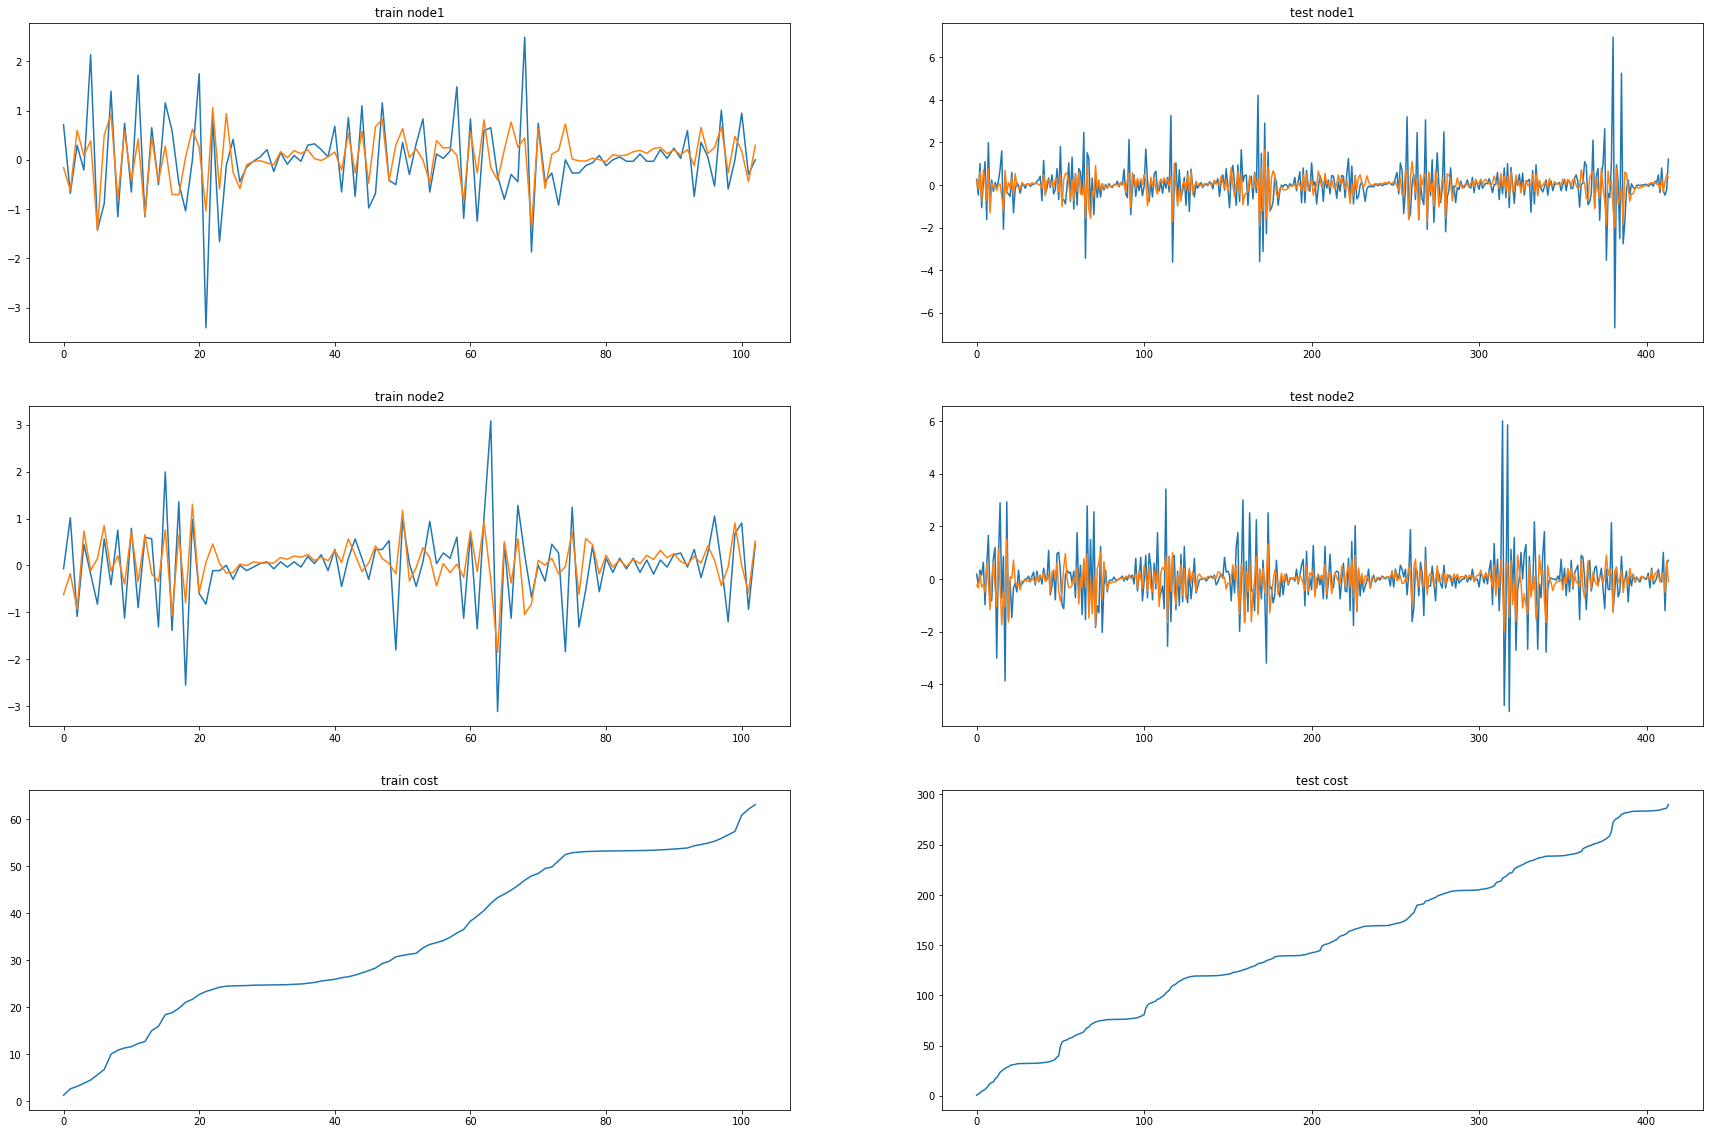

In [40]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset1.targets[i][0] for i in range(train_dataset1.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset1.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset1.targets[i][0] for i in range(test_dataset1.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset1.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset1.targets[i][1] for i in range(train_dataset1.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset1.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset1.targets[i][1] for i in range(test_dataset1.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset1.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Pedalme Nodes = 4, Filters = 12

In [51]:
model2 = RecurrentGCN(node_features=4, filters=12)

optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

model2.train()
    

for epoch in tqdm(range(50)):
    cost = 0
    h, c = None, None
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset2):
        y_hat, h, c = model2(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer2.step()
    optimizer2.zero_grad()

100%|██████████| 50/50 [00:00<00:00, 78.17it/s]


In [52]:
model2.eval()
cost = 0
h, c = None, None
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset2):
    y_hat, h, c = model2(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.4772


In [53]:
_e = [_d[i].detach() for i in range(len(_d))]

In [54]:
_c = [_a1[i].detach() for i in range(len(_a1))]

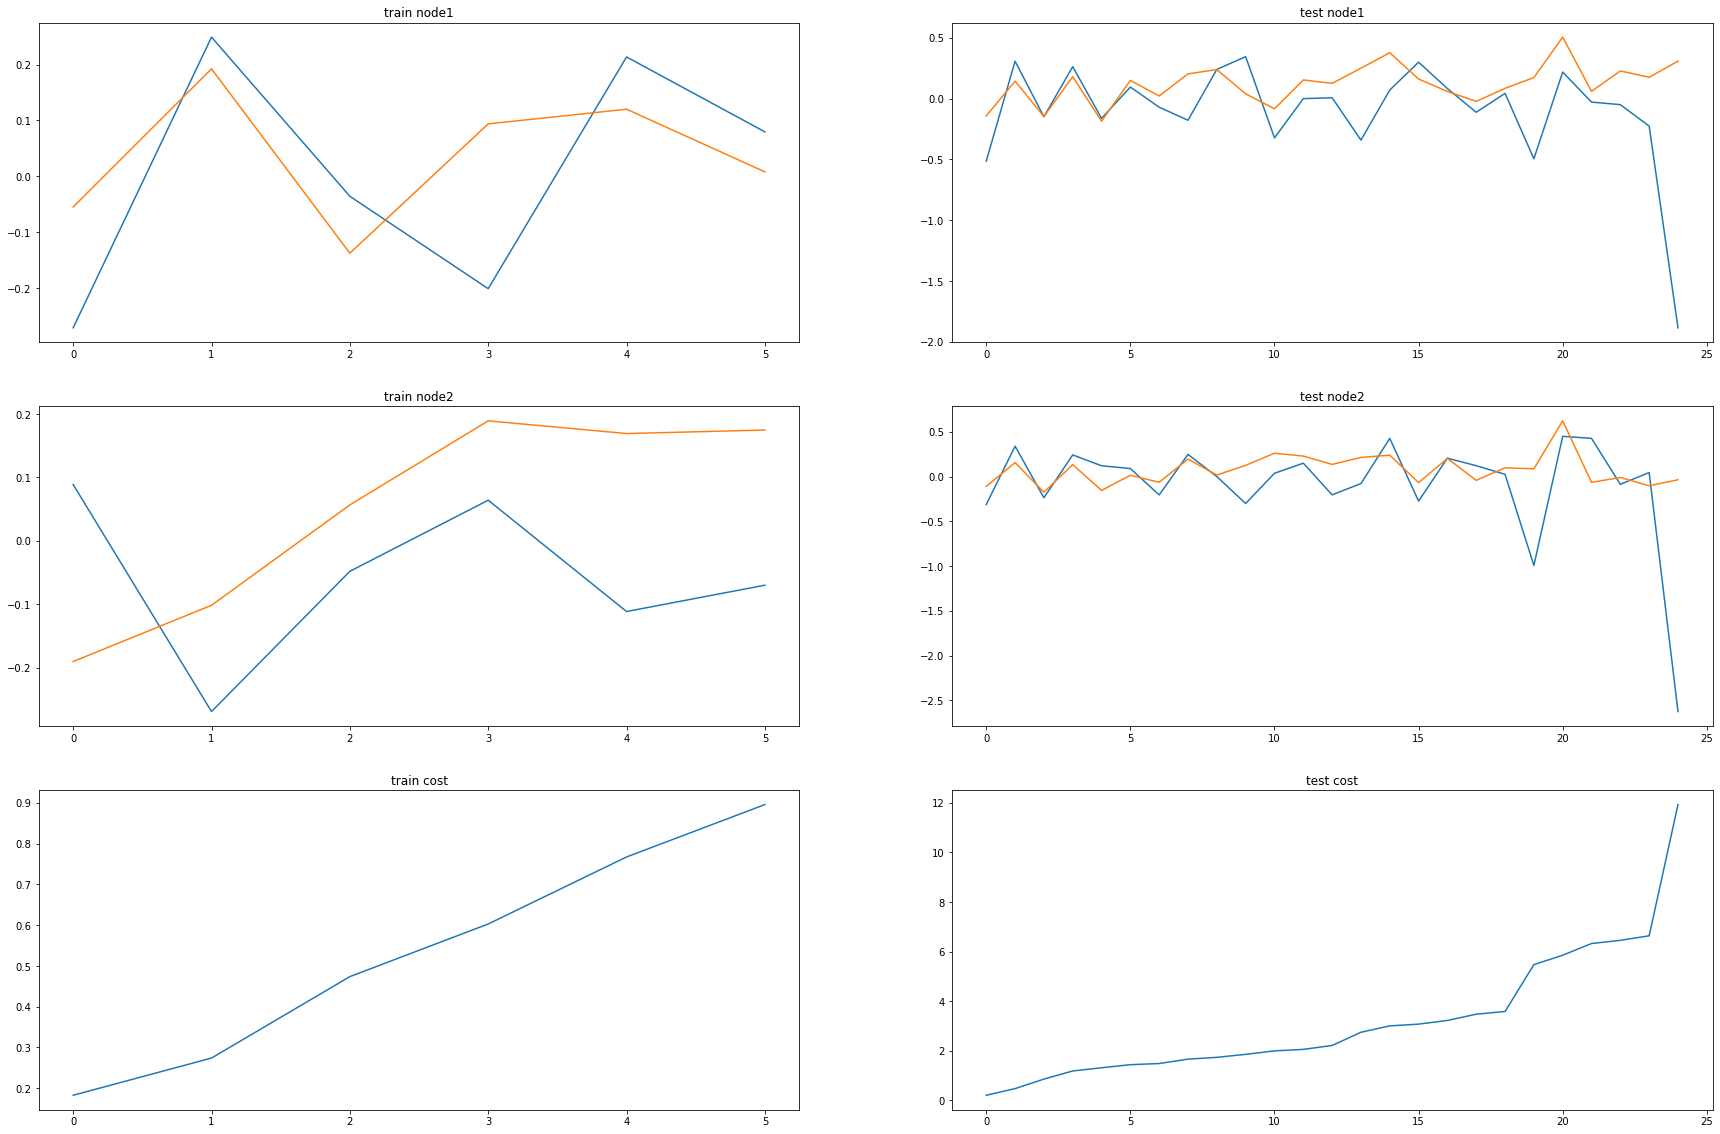

In [55]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset2.targets[i][0] for i in range(train_dataset2.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset2.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset2.targets[i][0] for i in range(test_dataset2.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset2.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset2.targets[i][1] for i in range(train_dataset2.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset2.snapshot_count)]))

ax4.set_title('test node2')
ax4.plot([test_dataset2.targets[i][1] for i in range(test_dataset2.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset2.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Wikimaths Nodes = 8, Filters = 12

In [57]:
model3 = RecurrentGCN(node_features=8, filters=12)

optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.01)

model3.train()

for epoch in tqdm(range(50)):
    cost = 0
    h, c = None, None
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset3):
        y_hat, h, c = model3(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer3.step()
    optimizer3.zero_grad()

100%|██████████| 50/50 [00:54<00:00,  1.09s/it]


In [59]:
model3.eval()
cost = 0
h, c = None, None
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset3):
    y_hat, h, c = model3(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.4763


In [60]:
_e = [_d[i].detach() for i in range(len(_d))]

In [61]:
_c = [_a1[i].detach() for i in range(len(_a1))]

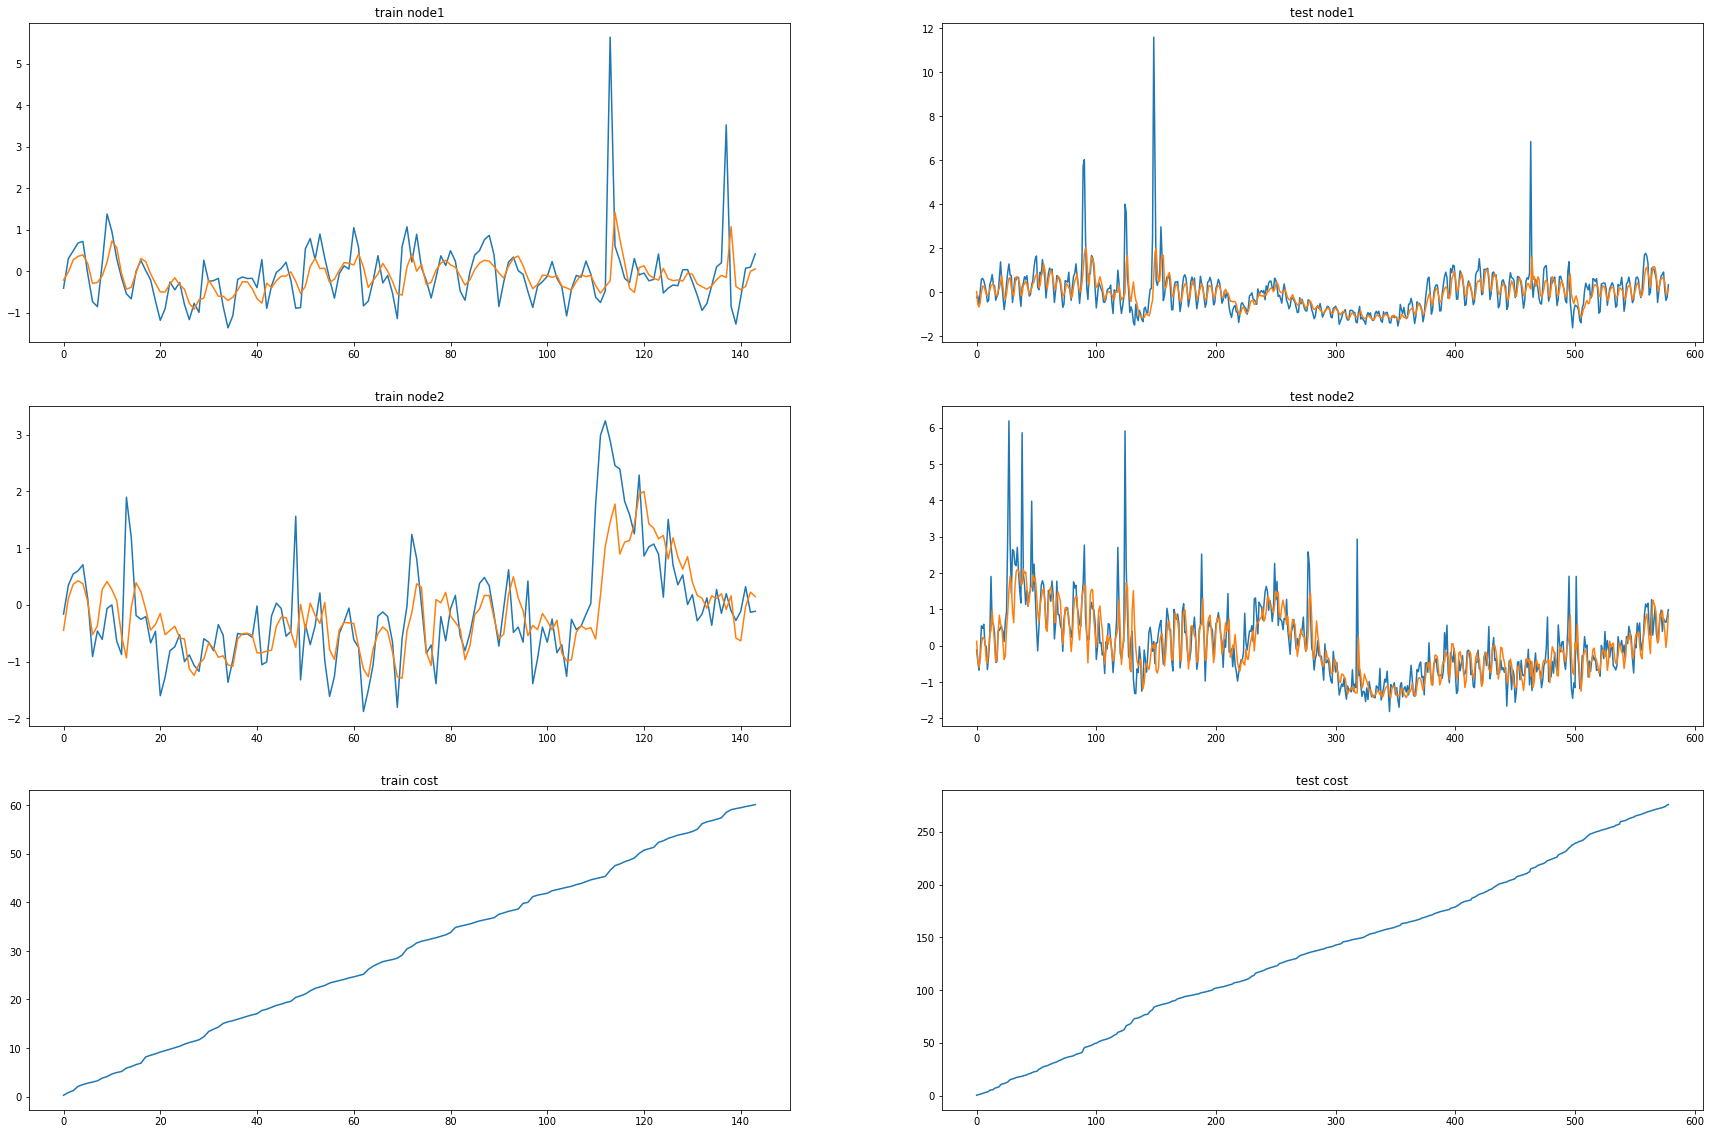

In [62]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset3.targets[i][0] for i in range(train_dataset3.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset3.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset3.targets[i][0] for i in range(test_dataset3.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset3.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset3.targets[i][1] for i in range(train_dataset3.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset3.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset3.targets[i][1] for i in range(test_dataset3.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset3.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Windmillsmall Nodes = 8, Filters = 12

In [78]:
model6 = RecurrentGCN(node_features=8, filters=12)

optimizer6 = torch.optim.Adam(model6.parameters(), lr=0.01)

model6.train()

for epoch in tqdm(range(10)):
    cost = 0
    h, c = None, None
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset6):
        y_hat, h, c = model6(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer6.step()
    optimizer6.zero_grad()

100%|██████████| 10/10 [01:13<00:00,  7.40s/it]


In [80]:
model6.eval()
cost = 0
h, c = None, None
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset6):
    y_hat, h, c = model6(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.9957


In [81]:
_e = [_d[i].detach() for i in range(len(_d))]

In [82]:
_c = [_a1[i].detach() for i in range(len(_a1))]

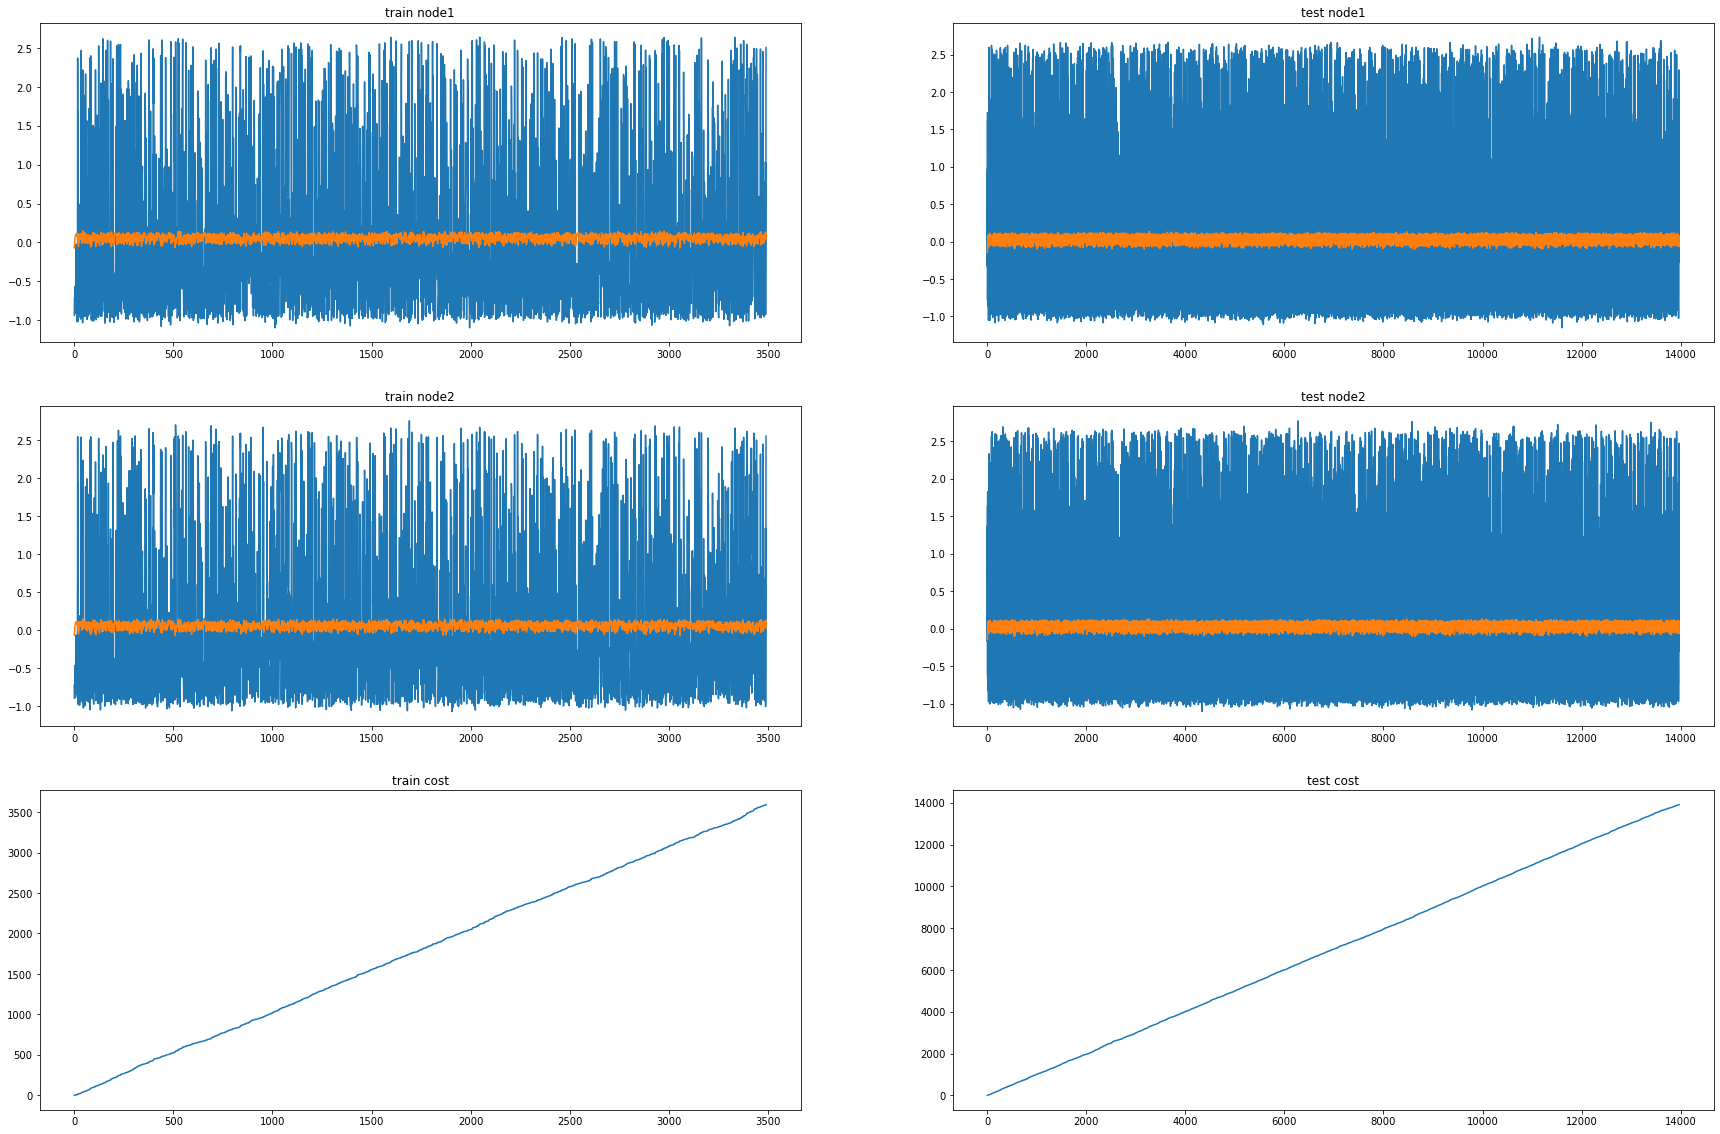

In [83]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset6.targets[i][0] for i in range(train_dataset6.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset6.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset6.targets[i][0] for i in range(test_dataset6.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset6.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset6.targets[i][1] for i in range(train_dataset6.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[1] for i in range(train_dataset6.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset6.targets[i][1] for i in range(test_dataset6.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[1] for i in range(test_dataset6.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)

### Monte Nodes = 4, Filters = 12

In [72]:
model10 = RecurrentGCN(node_features=4, filters=12)

optimizer10 = torch.optim.Adam(model10.parameters(), lr=0.01)

model10.train()

for epoch in tqdm(range(50)):
    cost = 0
    h, c = None, None
    _b=[]
    _d=[]
    for time, snapshot in enumerate(train_dataset10):
        y_hat, h, c = model10(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
        y_hat = y_hat.reshape(-1)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
        _b.append(y_hat)
        _d.append(cost)
    cost = cost / (time+1)
    cost.backward()
    optimizer10.step()
    optimizer10.zero_grad()

100%|██████████| 50/50 [01:01<00:00,  1.22s/it]


In [73]:
model10.eval()
cost = 0
h, c = None, None
_a=[]
_a1=[]
for time, snapshot in enumerate(test_dataset10):
    y_hat, h, c = model10(snapshot.x, snapshot.edge_index, snapshot.edge_attr, h, c)
    y_hat = y_hat.reshape(-1)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
    _a.append(y_hat)
    _a1.append(cost)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 0.9060


In [74]:
_e = [_d[i].detach() for i in range(len(_d))]

_c = [_a1[i].detach() for i in range(len(_a1))]

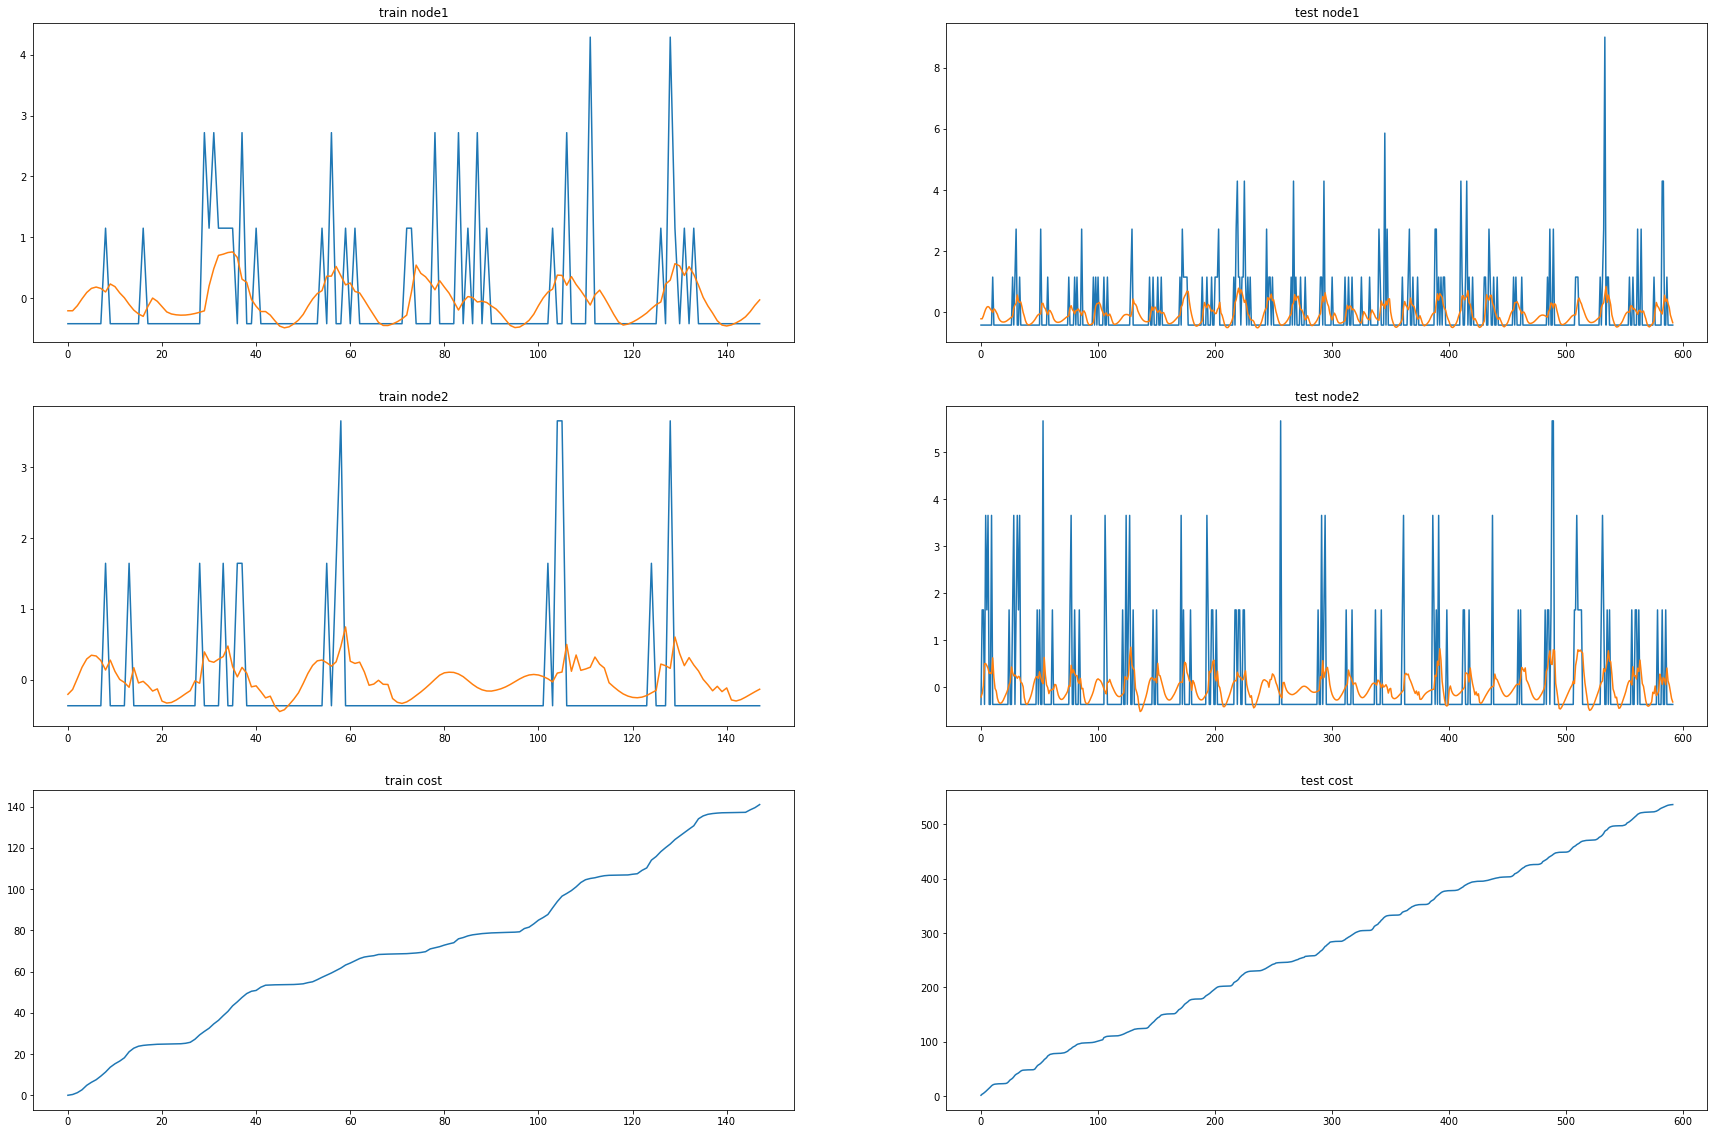

In [75]:
fig, (( ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(30,20))

ax1.set_title('train node1')
ax1.plot([train_dataset10.targets[i][0] for i in range(train_dataset10.snapshot_count)])
ax1.plot(torch.tensor([_b[i].detach()[0] for i in range(train_dataset10.snapshot_count)]))

ax2.set_title('test node1')
ax2.plot([test_dataset10.targets[i][0] for i in range(test_dataset10.snapshot_count)])
ax2.plot(torch.tensor([_a[i].detach()[0] for i in range(test_dataset10.snapshot_count)]))

ax3.set_title('train node2')
ax3.plot([train_dataset10.targets[i][10] for i in range(train_dataset10.snapshot_count)])
ax3.plot(torch.tensor([_b[i].detach()[10] for i in range(train_dataset10.snapshot_count)]))


ax4.set_title('test node2')
ax4.plot([test_dataset10.targets[i][10] for i in range(test_dataset10.snapshot_count)])
ax4.plot(torch.tensor([_a[i].detach()[10] for i in range(test_dataset10.snapshot_count)]))

ax5.set_title('train cost')
ax5.plot(_e)

ax6.set_title('test cost')
ax6.plot(_c)